In [ ]:
from ultralytics import YOLO
import torch
import json
import os
device = "cuda" if torch.cuda.is_available() else "cpu" 

In [ ]:
model = YOLO('yolov8n-cls.pt')
results = model.train(
    data="data_new/",
    epochs=25,
    batch=16,
    device=device,
    imgsz = 70,
    workers = 2,
    optimizer="Adam",
    lr0=3e-4,
    dropout=0.5
)

In [ ]:
model = YOLO('runs/classify/train11/weights/best.pt')

In [ ]:
def classify_image(model, image_path):
    return names[model([image_path])[0].probs.top1]

In [4]:
def process_images_in_folders(root_folder, model):
    result_dict = {}

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)

        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    file_path = os.path.join(folder_path, file_name)
                    predicted_class = classify_image(model, file_path)
                    result_dict[file_path] = predicted_class

    return result_dict

In [5]:
def save_results_to_file(result_dict, output_file):
    with open(output_file, 'w') as file:
        json.dump(result_dict, file)

In [ ]:

root_folder = 'F:/pet projects/ImageQuizBot/data_new/val'

output_file = 'output_file.json'

result_dict = process_images_in_folders(root_folder, model)
save_results_to_file(result_dict, output_file)

In [4]:
def create_dictionary(folder_path):
    image_dict = {}
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            folder_name = os.path.basename(os.path.dirname(file_path))
            image_dict[file_path] = folder_name
    
    return image_dict

folder_path = "F:/pet projects/ImageQuizBot/data_new/val"
true_dict = create_dictionary(folder_path)

In [5]:
with open('F:/pet projects/ImageQuizBot/results_dict.json', 'r') as file:
    pred_dict = json.load(file)

In [14]:
def calculate_accuracy(dict1, dict2):
    common_keys = set(dict1.keys()) & set(dict2.keys())
    
    misses = []
    for key in common_keys:
        if dict1[key] != dict2[key]:
            misses.append(key)
    total_common_keys = len(common_keys)
    
    accuracy = ((total_common_keys - len(misses)) / total_common_keys) * 100 if total_common_keys > 0 else 0
    
    return accuracy, misses

In [15]:
misses = calculate_accuracy(pred_dict, true_dict)[1]

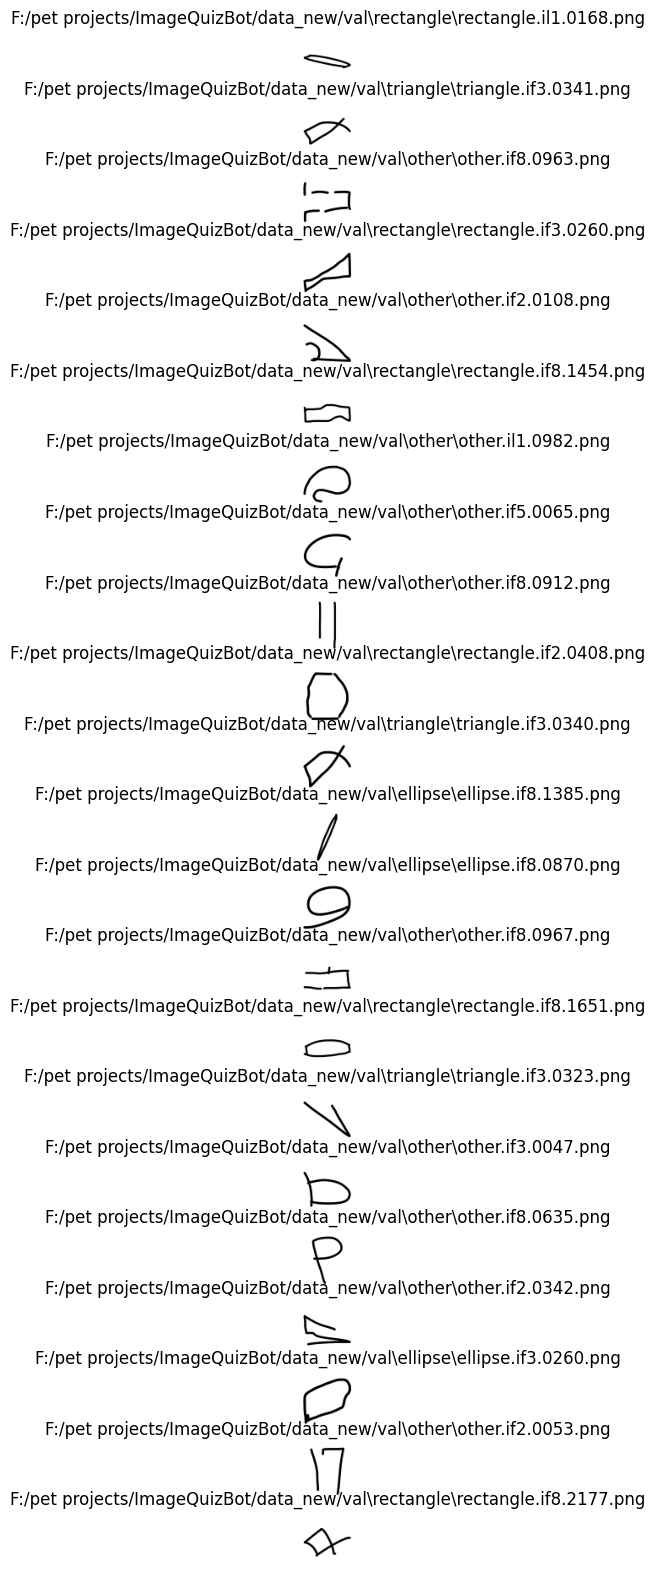

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
fig, axs = plt.subplots(len(misses), 1, figsize=(15, 20))

for i, path in enumerate(misses):
    try:
        img = Image.open(path)
        axs[i].imshow(img)
        axs[i].set_title(f"{path}")
        axs[i].axis('off')  # Відключення координатних осей
    except Exception as e:
        print(f"Помилка при відкритті {path}: {e}")

plt.show()

In [22]:
calculate_accuracy(pred_dict, true_dict)[0]

98.84696016771488